Andrew Pan

This work is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/)

# Computational Bayesian Statistics Report 2

# Bayes Theorem Problems

## Chess Problem

Two identical twins are members of my chess club, but they never show up on the same day; in fact, they strictly alternate the days they show up.  I can't tell them apart except that one is a better player than the other:  Avery beats me 60% of the time and I beat Blake 70% of the time.  If I play one twin on Monday and win, and the other twin on Tuesday and lose, which twin did I play on which day?

### Answer

To solve this problem, we first need to find our hypotheses and their respective likelihoods.  Because the twins show up on alternating days, and this problem involves two consecutive days, we know that the twins either played in the order of Avery on Monday and Blake on Tuesday, or Blake on Monday and Avery on Tuesday.  We only need to know which twin showed up on Monday to infer that the other twin showed up on Tuesday, so for now we will only be concerned with Monday.  There isn't any information on which twin showed up on Monday, but since they are identical we will assume there is a 50% chance.  We will first create a pmf for these two hypotheses and their prior data:

In [78]:
from thinkbayes2 import Pmf, Suite, Cdf
pmf = Pmf(dict(Avery = .5, Blake = .5))

Next, we determine the likelihoods for each hypothesis.  In the case of Avery showing up on Monday, the probability of winning on Monday is 40% and losing on Tueday is 30%.  The likelihood of this occurence happening is the product of the two individual probabilities, and will be multiplied with the prior data to find the posterior.  The same operation can be performed on the other hypothesis, with a 70% chance of winning on Monday against Blake and a 60% chance of losing on Tuesday:

In [79]:
pmf['Avery'] *= .4 * .3
pmf['Blake'] *= .7 * .6

All that's left to do is normalize the posterior data

In [80]:
pmf.Normalize()
pmf.Print()

Avery 0.22222222222222218
Blake 0.7777777777777777


Based on this result, there is a 78% probability that Blake showed up on Monday and Avery showed up on Tuesday

## Hold'em Problem

From https://www.pokernews.com/strategy/call-or-fold-bayes-theorem-poker-uncertainty-2-24133.htm

Let’s imagine you’re playing a heads-up cash game for all the money you have in the world. (Which is a bad idea. Don’t ever do that.) Your opponent is named Teddy, and he bears an uncanny resemblance to John Malkovich.

You’ve been playing for many hours, and because you are observant, you have been able to build a good mental database of how Teddy plays. When he bets on the river, about 60% of the time it’s a value bet; he’s bluffing about 40%.

So now you’re facing just such a river bet, and your hand is, say, top pair with a mediocre kicker. It’s functionally just a bluff-catcher. If you think Teddy is value betting, it’s surely with a better hand than yours, and you should fold. You’ll call only if you conclude that he’s bluffing.

Fortunately, you have picked up a tell on Teddy. He has a tray full of Oreo cookies next to him as he plays. When he’s waiting for you to make a decision, he’ll pick one up and twist it open. His tell is that when he’s strong, he’ll then eat the cookie, but when he’s bluffing, he puts it together again and back into the tray.

Unfortunately, this tell, like most others, is imperfect. Sometimes he’s bluffing but eats the cookie, anyway, and sometimes he’s value betting but puts the cookie away. Your careful tally shows that when he’s bluffing, he’ll put the cookie away 80% of the time, but eat it about 20% of the time. When he’s value betting, those numbers are reversed. Note that this is a very good tell — about 80% accurate, making it much more reliable than most.

On this particular hand, as you’re pondering your action, he puts the cookie back. Should you call or fold? 

### Answer

To give this problem a bit of context, I'll explain some of the poker terminology.  This scenario takes place in a heads-up game of Texas hold'em, meaning there are only two players.  In Texas hold'em, each player is dealt two cards, and communal cards are dealt in the center with bets taking place before and after the first three, the fourth, and the fifth.  A river bet is a bet after the fifth card has been dealt, and the description of your hand as a "top pair with a mediocre kicker" means that with your hand and the community cards, the best play you have is the highest pair on the board, and a single mediocre card.  To solve this problem, we can first determine the priors: Teddy's river bets are an actual bet 60% of the time, and a bluff 40%.  We will create a Pmf object and assign the data to it.

In [81]:
pmf = Pmf(dict(Bet = .6, Bluff = .4))

Since Teddy put the Oreo back into his tray, we can now determine the likelihoods to multiply the prior data by.  Because he puts the cookie away 80% of the time when bluffing, we will multiply the "Bluff" hypothesis prior by 0.8, and the "Bet" hypothesis prior by 0.2 to obtain the posterior data.

In [82]:
pmf['Bet'] *= .2
pmf['Bluff'] *= .8

Now that we have our posterior data, we just have to normalize it.

In [83]:
pmf.Normalize()
pmf.Print()

Bet 0.2727272727272727
Bluff 0.7272727272727273


Given Teddy's tell, there is a 73% chance that he is bluffing on this hand, making for favorable odds to call his bet!

But what if Teddy is a much tighter player, and his river bets are 90% strong hands and 10% bluffs?  We'll apply the same operations as above, but with the new prior data.

In [84]:
pmf = Pmf(dict(Bet = .9, Bluff = .1))
pmf['Bet'] *= .2
pmf['Bluff'] *= .8
pmf.Normalize()
pmf.Print()

Bet 0.6923076923076923
Bluff 0.3076923076923077


In this case, there is only a 31% chance that Teddy is bluffing, and a 69% chance that he actually has a strong hand.  In this case, it is most likely in your best decision to fold and wait for the next round to continue betting.

## Euro Problem


Suppose you believe that most coins are fair or unlikely to deviate from 50% by more than a few percentage points.  Construct a prior that captures this belief and update it with the Euro data.  How much effect does it have on the posterior, compared to the uniform prior?

In [85]:
from scipy import special

class Beta:
    """Represents a Beta distribution.

    See http://en.wikipedia.org/wiki/Beta_distribution
    """
    def __init__(self, alpha=1, beta=1, label=None):
        """Initializes a Beta distribution."""
        self.alpha = alpha
        self.beta = beta
        self.label = label if label is not None else '_nolegend_'

    def Update(self, data):
        """Updates a Beta distribution.

        data: pair of int (heads, tails)
        """
        heads, tails = data
        self.alpha += heads
        self.beta += tails

    def Mean(self):
        """Computes the mean of this distribution."""
        return self.alpha / (self.alpha + self.beta)

    def MAP(self):
        """Computes the value with maximum a posteori probability."""
        a = self.alpha - 1
        b = self.beta - 1
        return a / (a + b)

    def Random(self):
        """Generates a random variate from this distribution."""
        return random.betavariate(self.alpha, self.beta)

    def Sample(self, n):
        """Generates a random sample from this distribution.

        n: int sample size
        """
        size = n,
        return np.random.beta(self.alpha, self.beta, size)

    def EvalPdf(self, x):
        """Evaluates the PDF at x."""
        return x ** (self.alpha - 1) * (1 - x) ** (self.beta - 1)

    def MakePmf(self, steps=101, label=None):
        """Returns a Pmf of this distribution.

        Note: Normally, we just evaluate the PDF at a sequence
        of points and treat the probability density as a probability
        mass.

        But if alpha or beta is less than one, we have to be
        more careful because the PDF goes to infinity at x=0
        and x=1.  In that case we evaluate the CDF and compute
        differences.

        The result is a little funny, because the values at 0 and 1
        are not symmetric.  Nevertheless, it is a reasonable discrete
        model of the continuous distribution, and behaves well as
        the number of values increases.
        """
        if label is None and self.label is not None:
            label = self.label

        if self.alpha < 1 or self.beta < 1:
            cdf = self.MakeCdf()
            pmf = cdf.MakePmf()
            return pmf

        xs = [i / (steps - 1) for i in range(steps)]
        probs = [self.EvalPdf(x) for x in xs]
        pmf = Pmf(dict(zip(xs, probs)), label=label)
        return pmf

    def MakeCdf(self, steps=101):
        """Returns the CDF of this distribution."""
        xs = [i / (steps - 1) for i in range(steps)]
        ps = special.betainc(self.alpha, self.beta, xs)
        cdf = Cdf(xs, ps)
        return cdf

    def Percentile(self, ps):
        """Returns the given percentiles from this distribution.

        ps: scalar, array, or list of [0-100]
        """
        ps = np.asarray(ps) / 100
        xs = special.betaincinv(self.alpha, self.beta, ps)
        return xs

### Answer

Using the Beta class defined above, we can define a distribution that is centered around 0.5 by choosing equal values for alpha and beta that are both greater than 1:

0.5576923076923077


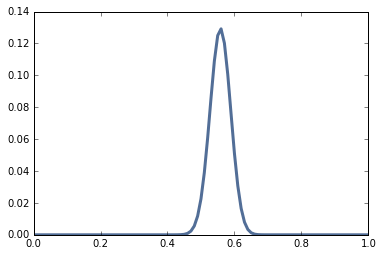

In [86]:
import thinkplot
% matplotlib inline
b = Beta(5, 5)
b.Update((140, 110))
print(b.Mean())
thinkplot.Pdf(b.MakePmf())

Compared to the result for a uniform distribution:

0.5595238095238095


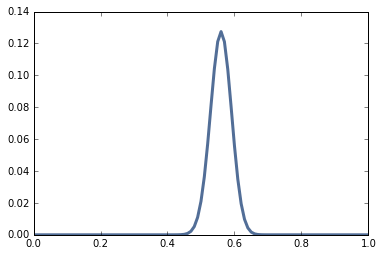

In [87]:
beta = Beta()
beta.Update((140, 110))
print(beta.Mean())
thinkplot.Pdf(beta.MakePmf())

Inputing a prior that is more focused around 50% slightly decreases the mean of the pmf after updating, and slightly shifts the distribution towards the center.

## Kim Rhode Problem

At the 2016 Summer Olympics in the Women's Skeet event, Kim Rhode faced Wei Meng in the bronze medal match.  They each hit 15 of 25 skeets, sending the match into sudden death.  In the first round, both hit 1 of 2 skeets.  In the next two rounds, they each hit 2 skeets.  Finally, in the fourth round, Rhode hit 2 and Wei hit 1, so Rhode won the bronze medal, making her the first Summer Olympian to win an individual medal at six consecutive summer games.

But after all that shooting, what is the probability that Rhode is actually a better shooter than Wei?  If the same match were held again, what is the probability that Rhode would win?

As always, you will have to make some modeling decisions, but one approach is to estimate, for each shooter, the probability of hitting a skeet.  Then, to estimate the probability that Rhode is a better shooter, you can draw samples from the two posterior distributions and compare them.  To estimate the probability of winning a rematch, you could draw samples from the posterior distributions and simulate a round of 25 shots.

### Answer

To start with, the probability of skeet shooters having a uniform distribution of probabilities of hitting a skeet is inaccurate, but since we don't have a large amount of data the alpha and beta values should only be slightly changed to produce a curve in the distribution.  Next, we update each shooter's Beta class with the number of skeets they hit and missed.  

To determine the probability of Rhode being a better shooter than Wei, we can create a Cdf for a large number of sample data based off of the current probability distribution in the Beta classes.  Using numpy's mean function, we can compute the percentage of sample trials in which Rhode had a higher score than Wei.

To determine the probability that Rhode would win again in a rematch, we can use numpy's random.binomial function to create a set of skeet shots for Rhode and Wei based off of the Cdf data again, and count the number of times that Rhode's score is greater than Wei's.

In [88]:
import numpy as np

rhode = Beta(2, 2)
rhode.Update((22, 11))
wei = Beta(2, 2)
wei.Update((21, 12))

rhode_sample = rhode.MakeCdf(10001).Sample(10000)
wei_sample = wei.MakeCdf(10001).Sample(10000)
print('Probability that Rhode is a better shooter: ' + str(np.mean(rhode_sample > wei_sample)))

rhode_rematch = np.random.binomial(25, rhode_sample)
wei_rematch = np.random.binomial(25, wei_sample)
count = 0
for p1, p2 in zip(rhode_rematch, wei_rematch):
    count += 1 if p1 > p2 else 0
print('Probability that Rhode would win a rematch: ' + str(count/len(rhode_rematch)))

Probability that Rhode is a better shooter: 0.5945
Probability that Rhode would win a rematch: 0.5182


## Unreliable Coin Problem

Suppose that instead of observing coin tosses directly, you measure the outcome using an instrument that is not always correct. Specifically, suppose there is a probability `y` that an actual heads is reported as tails, or actual tails reported as heads.

Write a class that estimates the bias of a coin given a series of outcomes and the value of `y`.

How does the spread of the posterior distribution depend on `y`?

### Answer

To solve this question, we first need to create a class to reflect a coin flip with a probability y for the result to be read incorrectly:

In [89]:
class badCoinMeasure(Beta):
    def __init__(self, alpha=1, beta=1, y = 0, label=None):
        """Initializes a Beta distribution."""
        self.alpha = alpha
        self.beta = beta
        self.y = y
        self.label = label if label is not None else '_nolegend_'
        
    def Update(self, data):
        """Updates a Beta distribution.

        data: pair of int (heads, tails)
        """
        heads, tails = data
        self.alpha += heads * (1-self.y)
        self.beta += tails * (1-self.y)

Next, we can create multiple Beta distributions using our new class for varying values of y.  We will use alpha and beta values of 3, because we know that the probability distribution of coin tosses should not be uniform, but might not be significantly focused around 0.5:

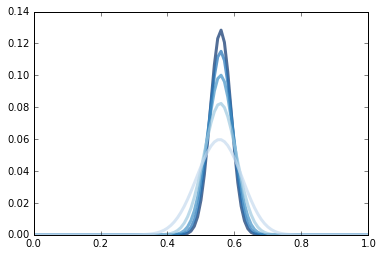

In [90]:
b = badCoinMeasure(3, 3)
b1 = badCoinMeasure(3, 3, .2)
b2 = badCoinMeasure(3, 3, .4)
b3 = badCoinMeasure(3, 3, .6)
b4 = badCoinMeasure(3, 3, .8)

b.Update((140, 110))
b1.Update((140, 110))
b2.Update((140, 110))
b3.Update((140, 110))
b4.Update((140, 110))

thinkplot.Pdf(b.MakePmf())
thinkplot.Pdf(b1.MakePmf())
thinkplot.Pdf(b2.MakePmf())
thinkplot.Pdf(b3.MakePmf())
thinkplot.Pdf(b4.MakePmf())

In the plot, lighter colored lines represent the distrbutions of higher y values.  For larger values of y, the posterior distribution is slightly wider and shorter, because there is a lower probability that the recorded measurement was actually correct for any given coin toss.

## Original Bayes Theorem Problem

In the everlasting greens of Bunnyland, bunnies roam freely and do what bunnies do best: mate.  The bunnies of Bunnyland mate progressively more often as the temperature becomes warmer, and rarely mate when the weather is cold.  Each time a pair of bunnies mate, there is a 30% chance of conception, and a bunny will be born 2 months later.  Unfortunately, the birth puts a lot of strain on the mother, and on average 50% of mothers in Bunnyland die a month after birth.  

I decide to take a trip to Bunnyland in December and meet the bunnies born this past year.  If I only find 5 new bunnies born that December, what is the probability that the next new bunny found was conceived in the summer and its mother is still alive?

### Answer

The first step in solving this problem is to define a Beta distribution for the mating pattern of the bunnies.  We know that the bunnies mate in accordance with the temperature, so we can define a Beta distrubtion and x-axis such that mating is more likely to occur in the warmer summer months than in the colder winter ones.  Treating the far left of the plot as January and the far right as December, we can treat the middle section as the summer months, and plotting a simple curve over this axis gives an approximate model of our system.  We will choose alpha and beta values to represent the peak of summer in July, the seventh month of the year.

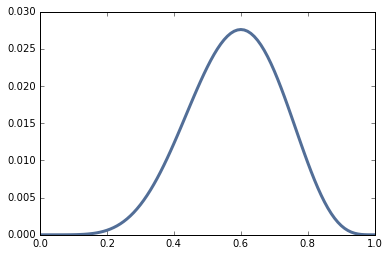

In [98]:
b = Beta(7, 5)
thinkplot.Pdf(b.MakePmf())

The actual chance of conception is irrelevant, as multiplying a values in the distribution by 0.3 wouldn't do anything since the distribution would eventually be normalized.  Next, we need to update the Beta distribution with some of the given data.  We have 5 bunnies born in December, and since our plot is already configured with January and December at the ends, we just need to call an Update with a tuple argument of 5 and 0.  Recall that the first point in the tuple was treated as a Heads in the Euro problem and a hit skeet in the Kim Rhodes problem, and will be treated as December here.

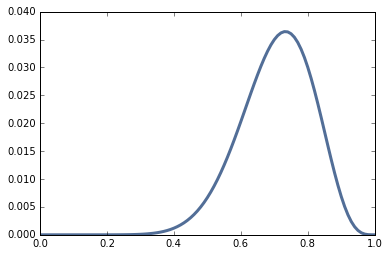

In [99]:
b.Update((5, 0))
thinkplot.Pdf(b.MakePmf())

Here is the tricky part: we need to determine the probability of the mother of the next bunny we find still being alive.  All that really matters here is the probability distribution of the conception month of the next bunny caught.  Because the bunnies take 2 months to be born, the probability of a bunny being conceived after October is 0.  Furthermore, because 50% of the mothers die only a month after birth, the mothers of bunnies conceived after September will not have died, while all other mothers only have a 50% probability of still being alive.  

To include this information, we can set the probabilities of bunnies conceived from November onwards to 0, and half the probabilities of bunnies conceived before October.

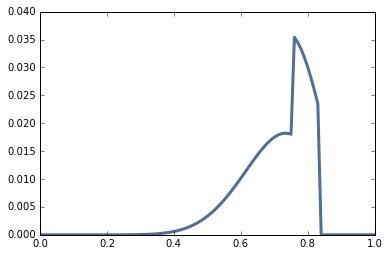

In [100]:
pmf = b.MakePmf()
for k, d in pmf.Items():
    if k > (10/12): #month indexing starts at 0, with 0/12 being the start of January and 12/12 being the end of December
        pmf[k] = 0
    elif k <= (9/12):
        pmf[k] = .5 * d
thinkplot.Pdf(pmf)

Now that we have our probability distribution for surviving bunny mothers' conception time, we just need to find the probability for summer births.  This probability is just the sum of all probabilities in the summer range of June to August.

In [101]:
print(sum([prob for val, prob in pmf.Items() if(val >= (5/12) and val <= (8/12))]))

0.1634609187692455


And so the probability of finding a bunny who was conceived during the summer and whose mother is still alive is 16%!